# Analyse de Iris.csv

## 0x000. Imports & Inits

In [92]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree

np.set_printoptions(precision=3)
sns.set_theme()

In [93]:
# Load the Iris dataset
iris = pd.read_csv('./iris.csv')
X = iris.drop('variety', axis=1)
classes = ['Setosa', 'Versicolor', 'Virginica']
y = iris[['variety']].replace(classes, [0, 1, 2])

def get_classes(k):
    if k is list():
        return [ classes[int(c)] for c in k ]
    else:
        return [ classes[int(k)] ]

## 0x100. DataViz

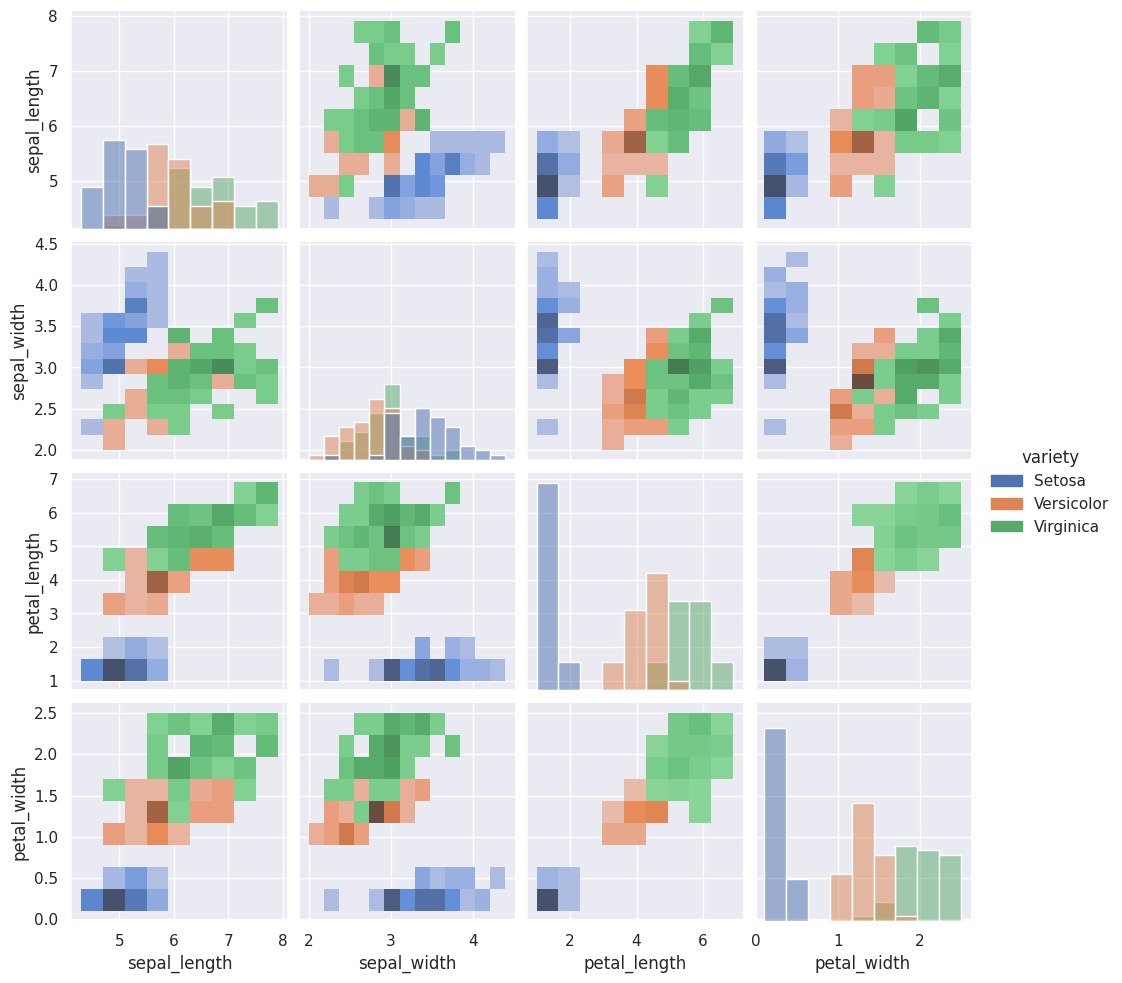

In [94]:
sns.pairplot(data=iris, hue='variety', kind="hist")

In [95]:
nobs, minmax, mean, variance, skewness, _ = scipy.stats.describe(iris.iloc[:,:4])
print(f"Number of Observations: {nobs}")
print(f"Min/Max: ({list(minmax[0])}, {list(minmax[1])})")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")

Number of Observations: 150
Min/Max: ([4.3, 2.0, 1.0, 0.1], [7.9, 4.4, 6.9, 2.5])
Mean: [5.843 3.057 3.758 1.199]
Variance: [0.686 0.19  3.116 0.581]
Skewness: [ 0.312  0.316 -0.272 -0.102]


## 0x200 Model Creation

In [96]:
# Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 0x300 Learning Summary
> Learning summary shows how the model predicts the `X_test`. In the current context it predicts all entries.

In [97]:
def learning_summary(X_test:DataFrame, y_test:DataFrame, classifier):
    size = len(X_test) if len(X_test) == len(y_test) else -1

    if size >= 0:
        y_attr = list(y_test)[0]
        cols_tuples = [('X_test', attr) for attr in list(X_test)] + [('y_test', y_attr)] + [('y_pred', y_attr)]
        df_summary = DataFrame(columns=pd.MultiIndex.from_tuples(cols_tuples, names=['Matrix', 'Data']))
        for i in range(size):
            X_i, y_i  = X_test.iloc[i].tolist(), y_test.iloc[i][0]
            h_i = classifier.predict([X_i])
            df_summary.loc[len(df_summary)] = X_i + get_classes(y_i) + get_classes(h_i)
    
    return df_summary if size >= 0 else None

learning_summary(X_test, y_test, clf)

Matrix       X_test                                           y_test  \
Data   sepal_length sepal_width petal_length petal_width     variety   
0               6.1         2.8          4.7         1.2  Versicolor   
1               5.7         3.8          1.7         0.3      Setosa   
2               7.7         2.6          6.9         2.3   Virginica   
3               6.0         2.9          4.5         1.5  Versicolor   
4               6.8         2.8          4.8         1.4  Versicolor   
5               5.4         3.4          1.5         0.4      Setosa   
6               5.6         2.9          3.6         1.3  Versicolor   
7               6.9         3.1          5.1         2.3   Virginica   
8               6.2         2.2          4.5         1.5  Versicolor   
9               5.8         2.7          3.9         1.2  Versicolor   
10              6.5         3.2          5.1         2.0   Virginica   
11              4.8         3.0          1.4         0.1      Setosa   
12              5.5         3.5          1.3         0.2      Setosa   
13              4.9         3.1          1.5         0.1      Setosa   
14              5.1         3.8          1.5         0.3      Setosa   
15              6.3         3.3          4.7         1.6  Versicolor   
16              6.5         3.0          5.8         2.2   Virginica   
17              5.6         2.5          3.9         1.1  Versicolor   
18              5.7         2.8          4.5         1.3  Versicolor   
19              6.4         2.8          5.6         2.2   Virginica   
20              4.7         3.2          1.6         0.2      Setosa   
21              6.1         3.0          4.9         1.8   Virginica   
22              5.0         3.4          1.6         0.4      Setosa   
23              6.4         2.8          5.6         2.1   Virginica   
24              7.9         3.8          6.4         2.0   Virginica   
25              6.7         3.0          5.2         2.3   Virginica   
26              6.7         2.5          5.8         1.8   Virginica   
27              6.8         3.2          5.9         2.3   Virginica   
28              4.8         3.0          1.4         0.3      Setosa   
29              4.8         3.1          1.6         0.2      Setosa   

Matrix      y_pred  
Data       variety  
0       Versicolor  
1           Setosa  
2        Virginica  
3       Versicolor  
4       Versicolor  
5           Setosa  
6       Versicolor  
7        Virginica  
8       Versicolor  
9       Versicolor  
10       Virginica  
11          Setosa  
12          Setosa  
13          Setosa  
14          Setosa  
15      Versicolor  
16       Virginica  
17      Versicolor  
18      Versicolor  
19       Virginica  
20          Setosa  
21       Virginica  
22          Setosa  
23       Virginica  
24       Virginica  
25       Virginica  
26       Virginica  
27       Virginica  
28          Setosa  
29          Setosa

In [98]:
# Cross-Validation Results
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross Valdation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.3}")
print(f"Standard Deviation: {cv_scores.std():.3}")

Cross Valdation Scores: [0.967 0.967 0.933 1.    1.   ]
Mean Accuracy: 0.973
Standard Deviation: 0.0249


In [99]:
# Model Evaluation Metrics
y_pred = clf.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")

Accuracy: 1.0
Mean Squared Error: 0.0


## 0x400 Decision Tree Visualisation

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

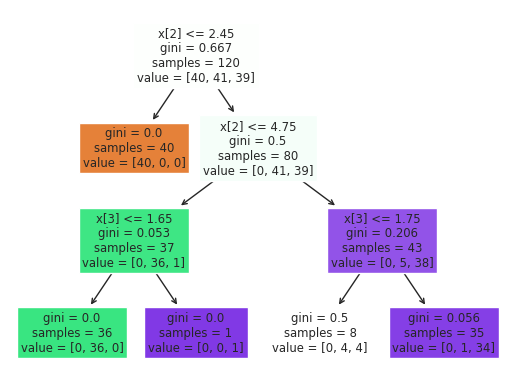

In [100]:
tree.plot_tree(clf, filled=True)

## 0x500 Exhaustive Grid Search

In [101]:
pgrid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 5, 10, 15, 20]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train.values, y_train)
grid_search.best_estimator_.score(X_test.values, y_test)

learning_summary(X_test, y_test, grid_search)

Matrix       X_test                                           y_test  \
Data   sepal_length sepal_width petal_length petal_width     variety   
0               5.8         2.8          5.1         2.4   Virginica   
1               6.0         2.2          4.0         1.0  Versicolor   
2               5.5         4.2          1.4         0.2      Setosa   
3               7.3         2.9          6.3         1.8   Virginica   
4               5.0         3.4          1.5         0.2      Setosa   
5               6.3         3.3          6.0         2.5   Virginica   
6               5.0         3.5          1.3         0.3      Setosa   
7               6.7         3.1          4.7         1.5  Versicolor   
8               6.8         2.8          4.8         1.4  Versicolor   
9               6.1         2.8          4.0         1.3  Versicolor   
10              6.1         2.6          5.6         1.4   Virginica   
11              6.4         3.2          4.5         1.5  Versicolor   
12              6.1         2.8          4.7         1.2  Versicolor   
13              6.5         2.8          4.6         1.5  Versicolor   
14              6.1         2.9          4.7         1.4  Versicolor   
15              4.9         3.6          1.4         0.1      Setosa   
16              6.0         2.9          4.5         1.5  Versicolor   
17              5.5         2.6          4.4         1.2  Versicolor   
18              4.8         3.0          1.4         0.3      Setosa   
19              5.4         3.9          1.3         0.4      Setosa   
20              5.6         2.8          4.9         2.0   Virginica   
21              5.6         3.0          4.5         1.5  Versicolor   
22              4.8         3.4          1.9         0.2      Setosa   
23              4.4         2.9          1.4         0.2      Setosa   
24              6.2         2.8          4.8         1.8   Virginica   
25              4.6         3.6          1.0         0.2      Setosa   
26              5.1         3.8          1.9         0.4      Setosa   
27              6.2         2.9          4.3         1.3  Versicolor   
28              5.0         2.3          3.3         1.0  Versicolor   
29              5.0         3.4          1.6         0.4      Setosa   
30              6.4         3.1          5.5         1.8   Virginica   
31              5.4         3.0          4.5         1.5  Versicolor   
32              5.2         3.5          1.5         0.2      Setosa   
33              6.1         3.0          4.9         1.8   Virginica   
34              6.4         2.8          5.6         2.2   Virginica   
35              5.2         2.7          3.9         1.4  Versicolor   
36              5.7         3.8          1.7         0.3      Setosa   
37              6.0         2.7          5.1         1.6  Versicolor   
38              5.9         3.0          4.2         1.5  Versicolor   
39              5.8         2.6          4.0         1.2  Versicolor   
40              6.8         3.0          5.5         2.1   Virginica   
41              4.7         3.2          1.3         0.2      Setosa   
42              6.9         3.1          5.1         2.3   Virginica   
43              5.0         3.5          1.6         0.6      Setosa   
44              5.4         3.7          1.5         0.2      Setosa   

Matrix      y_pred  
Data       variety  
0        Virginica  
1       Versicolor  
2           Setosa  
3        Virginica  
4           Setosa  
5        Virginica  
6           Setosa  
7       Versicolor  
8       Versicolor  
9       Versicolor  
10       Virginica  
11      Versicolor  
12      Versicolor  
13      Versicolor  
14      Versicolor  
15          Setosa  
16      Versicolor  
17      Versicolor  
18          Setosa  
19          Setosa  
20       Virginica  
21      Versicolor  
22          Setosa  
23          Setosa  
24       Virginica  
25          Setosa  
26          Setosa  
27    